In [1]:
# import libraries
import numpy as np
import os
import random as rand
import seaborn as sbn
from matplotlib import pyplot as plt
import pandas as pd
from multiprocess import Pool, cpu_count

In [2]:
import modelfn

## Step0: 

## Input data and define Metric and Fit Objective Functions

In [3]:
filelist=['SKMEL2_Karoulia_ff2_normtp1_1Dec21.gz','SKMEL2_Karoulia_ffCADP_normtp1_1Dec21.gz','SKMEL2_Karoulia_ffDPNC_normtp1_1Dec21.gz','SKMEL2_Karoulia_ffCANC_normtp1_1Dec21.gz','SKMEL2_Karoulia_ffCA_normtp1_1Dec21.gz','SKMEL2_Karoulia_ffDP_normtp1_1Dec21.gz','SKMEL2_Karoulia_ffNC_normtp1_1Dec21.gz'] 
modelslist=[ifile.split('_')[-3].split('ff')[1] for ifile in filelist]

In [4]:
dic_res10p=dict()
dic_dfreslist=dict()
it1=0
for ifile in filelist:
    dfres=pd.read_csv(ifile,sep='\t')
    imodel=modelslist[it1]
    dic_dfreslist[imodel]=dfres
    minerr=min(dfres['fitmetric'])
    max10p=minerr*1.1 # Since the best fit is not unique, a small interval is chosen around it to reprepsent best fits
#     max10p=dfres.fitmetric.quantile(0.1)
    dic_res10p[imodel]=dfres[dfres['fitmetric']<=max10p].sort_values(by='fitmetric')
    it1+=1
    del dfres
#     del minerr
    del max10p

In [5]:
setlen=lambda x:len(set(x))

In [6]:
setlen(dic_dfreslist['2'].irun),setlen(dic_res10p['2'].irun)

(1500, 35)

In [7]:
dic_fitmetric={ikey:[dic_res10p[ikey].drop_duplicates('irun')['fitmetric'].quantile(0.025),dic_res10p[ikey].drop_duplicates('irun')['fitmetric'].mean(),dic_res10p[ikey].drop_duplicates('irun')['fitmetric'].quantile(.975)] for ikey in modelslist}
df_fitmetric=pd.DataFrame(dic_fitmetric.values(),columns=['CL2.5','Mean','CL97.5'],index=modelslist)

In [8]:
for ikey in modelslist:
    dic_res10p[ikey]['Model']=ikey

In [9]:
dfFM=pd.concat(dic_res10p.values()).drop_duplicates('irun')

In [10]:
set(dfFM.Model)

{'2', 'CA', 'CADP', 'CANC', 'DP', 'DPNC', 'NC'}

## Figure 3D

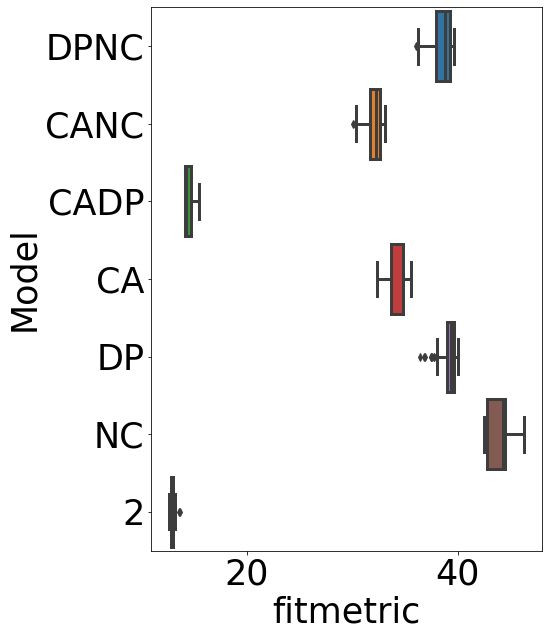

In [11]:
plt.rc('axes', labelsize=35)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=35)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)    # fontsize of the tick labels
plt.subplots(figsize=(7,10))
plot1=sbn.boxplot(y='Model',x='fitmetric',data=dfFM,linewidth=3,width=0.9,order=['DPNC', 'CANC', 'CADP', 'CA', 'DP','NC','2'])#,scale="width")#,ax=ax1)
plt.show()